# Actividades Semana 3

## Actividad 1.

Lea con OpenCV la imagen "alce.jpg" que está dentro de la carpeta "res". Conviértala a RGB y luego divídala en cuatro cuadrantes tales que el primer cuadrante muestre el color original de la imagen, el segundo muestre el canal azul únicamente, el tercero muestre el canal verde y el cuarto muestre el canal rojo.
<br>Debe obtener lo siguiente: </br>

<img src="res/actividad1.png"/>

(286, 388, 3)


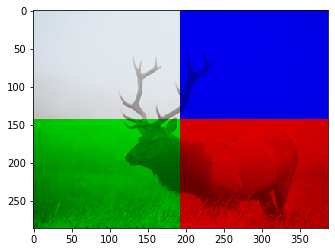

In [1]:
%matplotlib inline 

###Escriba su código aquí###

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("res/alce.png", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

shape = img.shape
print(shape)

img[:int(shape[0]/2), int(shape[1]/2):, 0] = 0
img[:int(shape[0]/2), int(shape[1]/2):, 1] = 0

img[int(shape[0]/2):, :int(shape[1]/2), 0] = 0
img[int(shape[0]/2):, :int(shape[1]/2), 2] = 0

img[int(shape[0]/2):, int(shape[1]/2):, 1] = 0
img[int(shape[0]/2):, int(shape[1]/2):, 2] = 0

plt.imshow(img)

## Actividad 2.

Algunos problemas de visión artificial, suelen abordarse mediante el estudio de los canales de los espacios de color, algunos de ellos: RGB, HSV, LAB, YUV y XYZ.

<br>Lea la imagen "frutas.jpg" que se encuentra en la carpeta "res" y realice un subplot que muestre la imagen en cada uno de los canales que conforman los espacios de color nombrados anteriormente. Adicionalmente muestre la imagen en escala de grises</br>

<br><b>Recuerde colocar título y subtitulos a las figuras.</b></br>

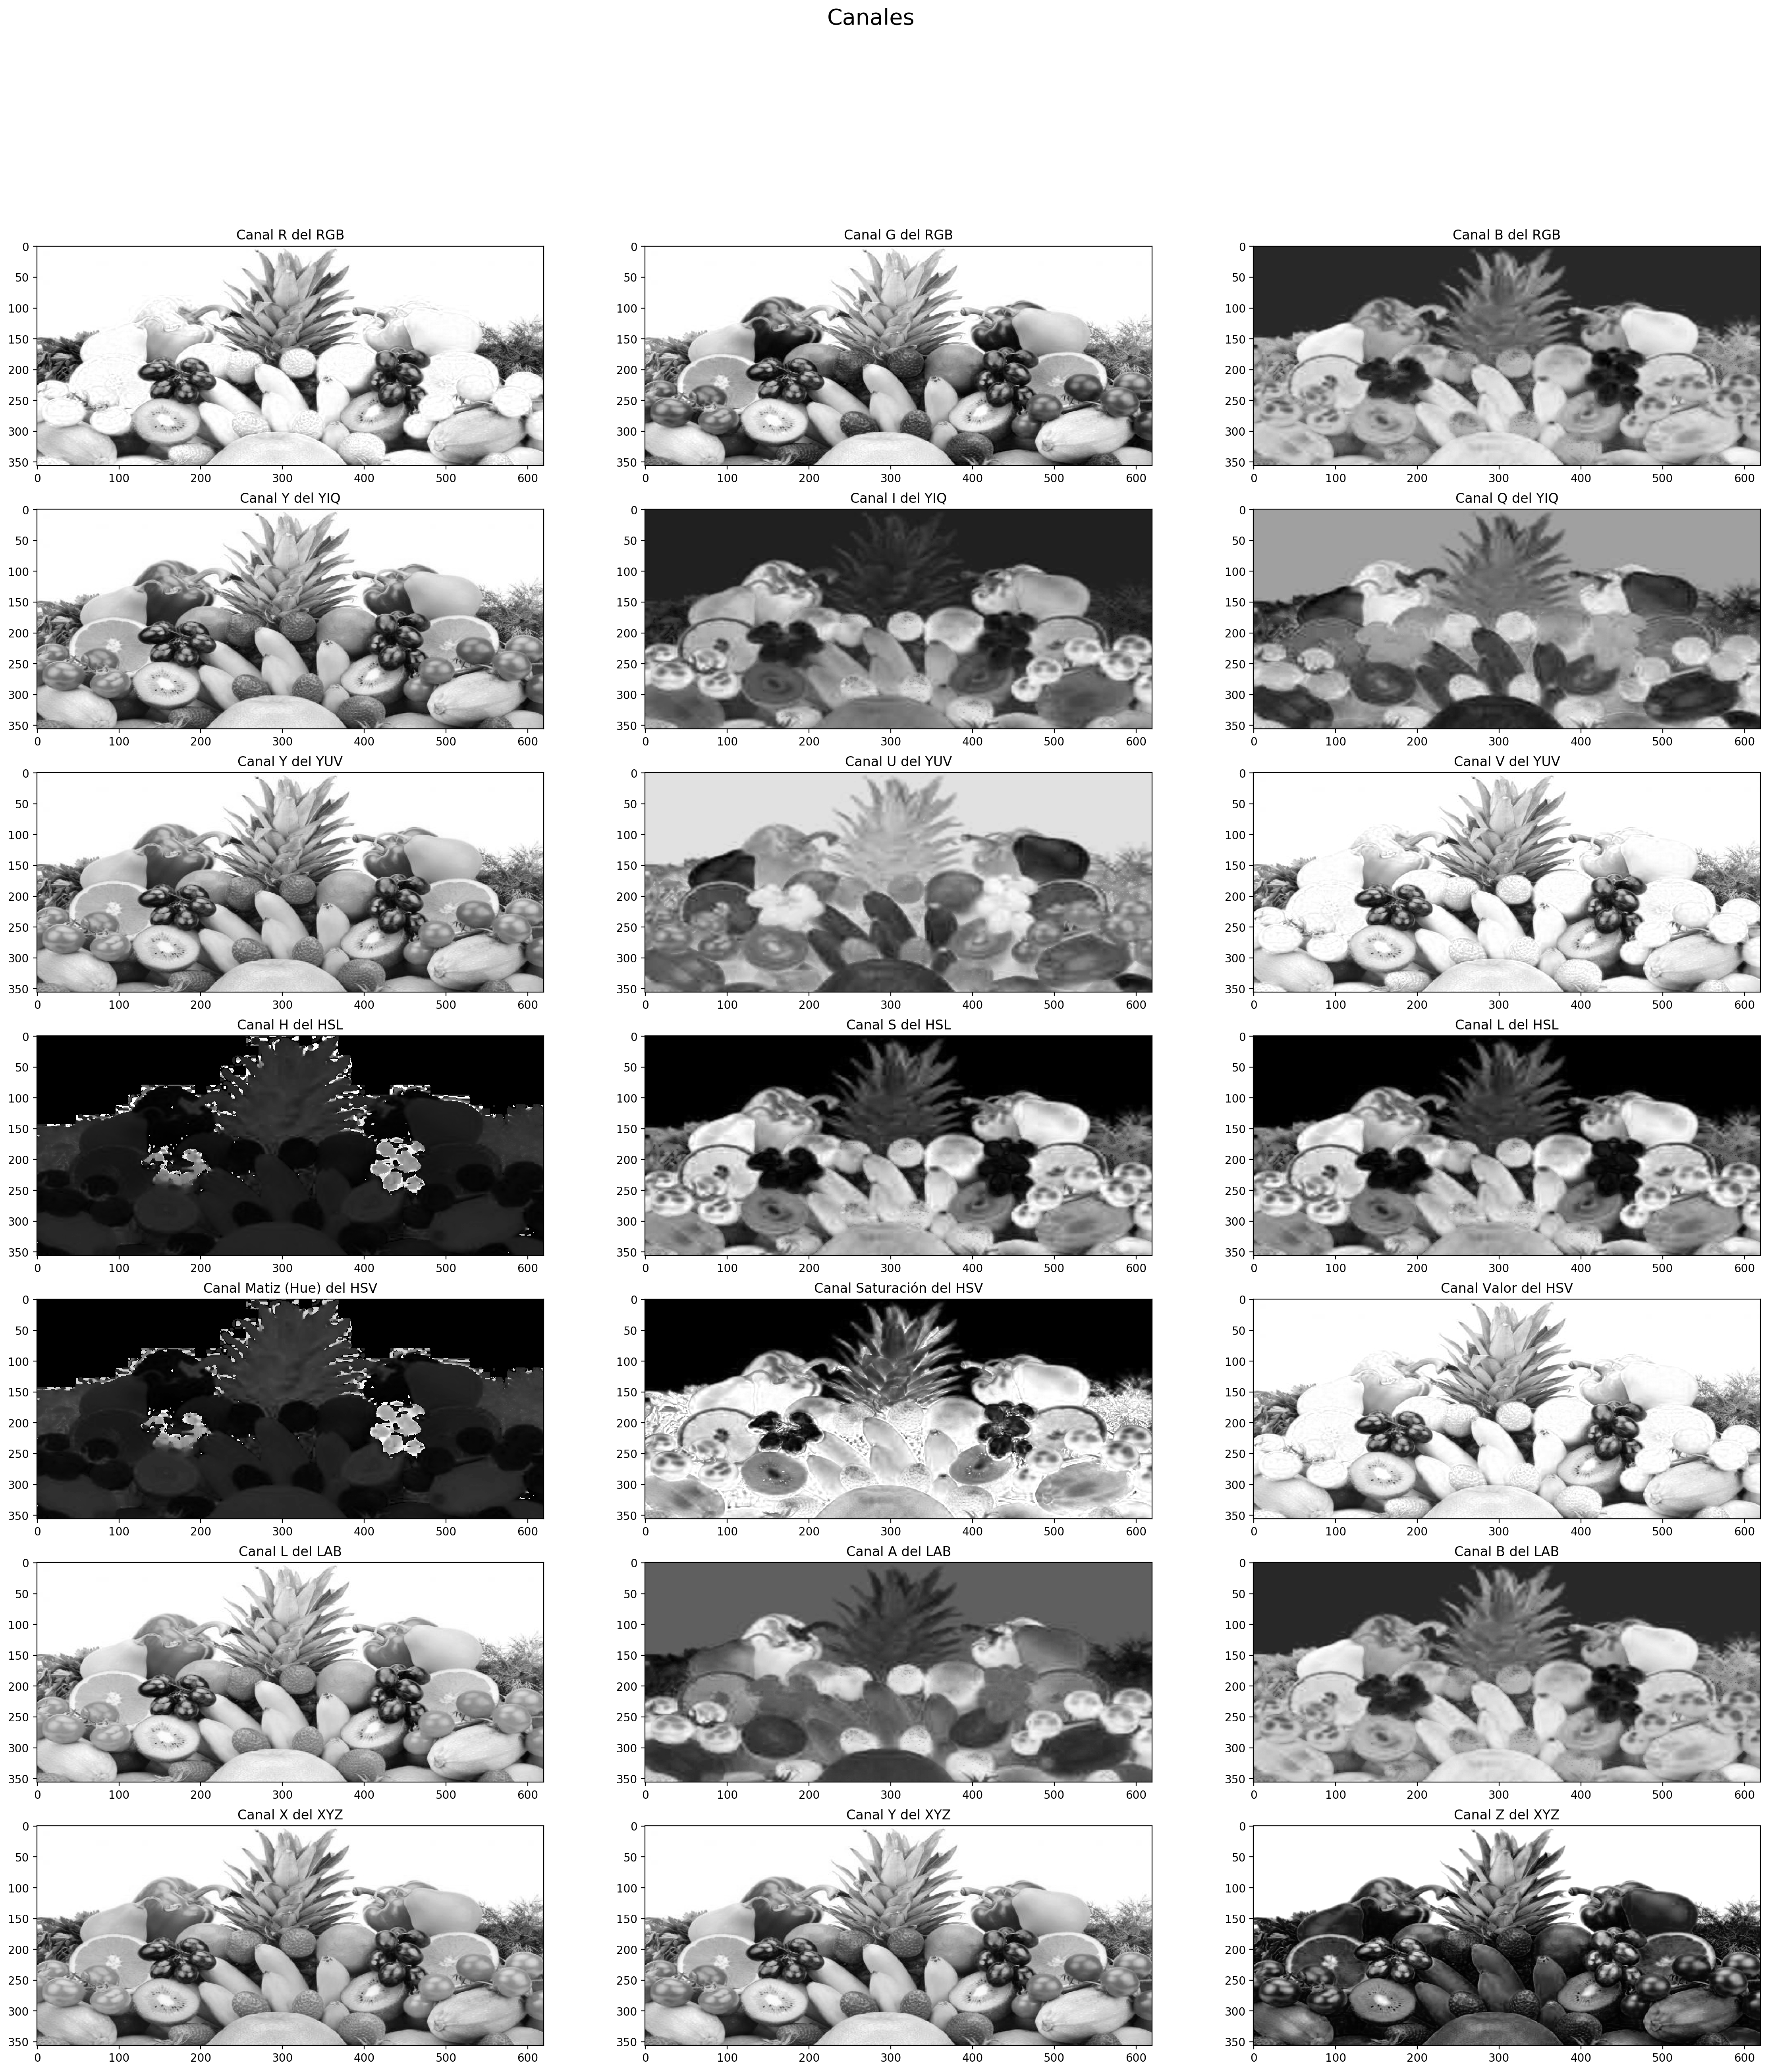

In [2]:

frutas = cv2.imread("res/frutas.jpg", cv2.IMREAD_COLOR)
frutas = cv2.cvtColor(frutas, cv2.COLOR_BGR2RGB)

img_R = frutas[:,:,0]
img_G = frutas[:,:,1]
img_B = frutas[:,:,2]

img_Y = 0.299*img_R + 0.587*img_G + 0.114*img_B
img_I = 0.596*img_R - 0.274*img_G - 0.322*img_B
img_Q = 0.211*img_R - 0.523*img_G + 0.312*img_B

img_yuv = cv2.cvtColor(frutas, cv2.COLOR_RGB2YUV)

img_Y2 = img_yuv[:,:,0]
img_U =  img_yuv[:,:,1]
img_V = img_yuv[:,:,2]

img_hsv = cv2.cvtColor(frutas, cv2.COLOR_RGB2HSV)

img_H = img_hsv[:,:,0]
img_S = img_hsv[:,:,1]
img_V = img_hsv[:,:,2]

img_rgb = frutas.astype(np.float32)/255 

tam = np.shape(frutas)
img_hsl =np.zeros((tam), dtype=np.float32)
#Convertir la imagen RGB a HSL canal por canal y guardarla en una matriz
#que representa la nueva imagen
#recorrer las filas y las columnas de la matriz tam
for i in range(tam[0]):
    for j in range(tam[1]):
        #sacar el máximo y el mínimo valor al recorrer las filas y columnas
        max_val = np.max(img_rgb[i][j])
        min_val = np.min(img_rgb[i][j])
        #crear los canales S y L del espacio HSL mediante transformaciones lineales
        s = max_val - min_val
        l = s/2
        #asignación de los canales a la matriz img_hsl
        img_hsl[i][j][1] = s
        img_hsl[i][j][2] = l
        #asignación de valores al canal H
        if(max_val==min_val):
            img_hsl[i][j][0] = 0
            continue
        #extracción de los canales del espacio RGB de la imagen
        red = img_rgb[i][j][0]
        green = img_rgb[i][j][1]
        blue = img_rgb[i][j][2]
        #normalización de los datos, en caso de que el vector max_val sea exactamente 
        #igual a uno de los canales del espacio RGB
        if(max_val == red):
            h = (green-blue)*60/(max_val-min_val)
        elif(max_val == green):
            h = (blue-red)*60/(max_val-min_val) + 120
        else:
            h = (red-green)*60/(max_val-min_val) + 240
        #condicional para que cada valor de h esté acotado entre 0 y 360 en cada iteración
        if h >= 0:
            img_hsl[i,j,0]=h
        else:
            img_hsl[i,j,0] = 360.0 - h

img_lab = cv2.cvtColor(frutas, cv2.COLOR_RGB2LAB)
img_L = img_lab[:,:,0]
img_A =  img_lab[:,:,1]
img_B = img_lab[:,:,2]

#XYZ
img_XYZ = cv2.cvtColor(frutas, cv2.COLOR_RGB2XYZ)
img_X = img_XYZ[:,:,0]
img_Y = img_XYZ[:,:,1]
img_Z = img_XYZ[:,:,2]


fig, ((ax1, ax2, ax3),
      (ax4, ax5, ax6), 
      (ax7, ax8, ax9),
     (ax10, ax11, ax12), 
     (ax13, ax14, ax15),
     (ax16, ax17, ax18),
     (ax19, ax20, ax21)) = plt.subplots(7,3, figsize=(28, 30), dpi = 200)

fig.suptitle('Canales', fontsize=20)
ax1.set_title('Canal R del RGB')
ax1.imshow(img_R, cmap='gray', aspect='auto')
ax2.set_title('Canal G del RGB')
ax2.imshow(img_G, cmap='gray', aspect='auto')
ax3.set_title('Canal B del RGB')
ax3.imshow(img_B, cmap='gray', aspect='auto')
ax4.set_title('Canal Y del YIQ')
ax4.imshow(img_Y, cmap='gray', aspect='auto')
ax5.set_title('Canal I del YIQ')
ax5.imshow(img_I, cmap='gray', aspect='auto')
ax6.set_title('Canal Q del YIQ')
ax6.imshow(img_Q, cmap='gray', aspect='auto')
ax7.set_title('Canal Y del YUV')
ax7.imshow(img_Y2, cmap='gray', aspect='auto')
ax8.set_title('Canal U del YUV')
ax8.imshow(img_U, cmap='gray', aspect='auto')
ax9.set_title('Canal V del YUV')
ax9.imshow(img_V, cmap='gray', aspect='auto')
ax10.set_title('Canal H del HSL')
ax10.imshow(img_hsl[:,:,0], cmap='gray', aspect='auto')
ax11.set_title('Canal S del HSL')
ax11.imshow(img_hsl[:,:,1], cmap='gray', aspect='auto')
ax12.set_title('Canal L del HSL')
ax12.imshow(img_hsl[:,:,2], cmap='gray', aspect='auto')
ax13.set_title('Canal Matiz (Hue) del HSV')
ax13.imshow(img_H, cmap='gray', aspect='auto')
ax14.set_title('Canal Saturación del HSV')
ax14.imshow(img_S, cmap='gray', aspect='auto')
ax15.set_title('Canal Valor del HSV')
ax15.imshow(img_V, cmap='gray', aspect='auto')
ax16.set_title('Canal L del LAB')
ax16.imshow(img_L, cmap='gray', aspect='auto')
ax17.set_title('Canal A del LAB')
ax17.imshow(img_A, cmap='gray', aspect='auto')
ax18.set_title('Canal B del LAB')
ax18.imshow(img_B, cmap='gray', aspect='auto')
ax19.set_title('Canal X del XYZ')
ax19.imshow(img_X, cmap='gray', aspect='auto')
ax20.set_title('Canal Y del XYZ')
ax20.imshow(img_Y, cmap='gray', aspect='auto')
ax21.set_title('Canal Z del XYZ')
ax21.imshow(img_Z, cmap='gray', aspect='auto')

¿Qué método propondría usted para diferenciar cada uno de los canales pertenecientes a los diferentes espacios de color? ¿Cómo las diferenciaría de la imagen en escala de grises?

## Actividad 3.

La versión de NTSC aprobada por la Comisión Federal de Comunicaciones, en Estados Unidos, realiza una ligera variación en las ecuaciones del modelo YIQ: 

<img src="res/modificacion.png"/>

<br>Lea la imagen "cells.png" que se encuentra en la carpeta "res", escriba un código donde implemente la transformación lineal YIQ  modificada sobre el espacio de color RGB.</br>
<br><b>Ayuda: Escriba en forma matricial el sistema para conocer las componentes R, G, B de los canales Y, I, Q.<b></br>

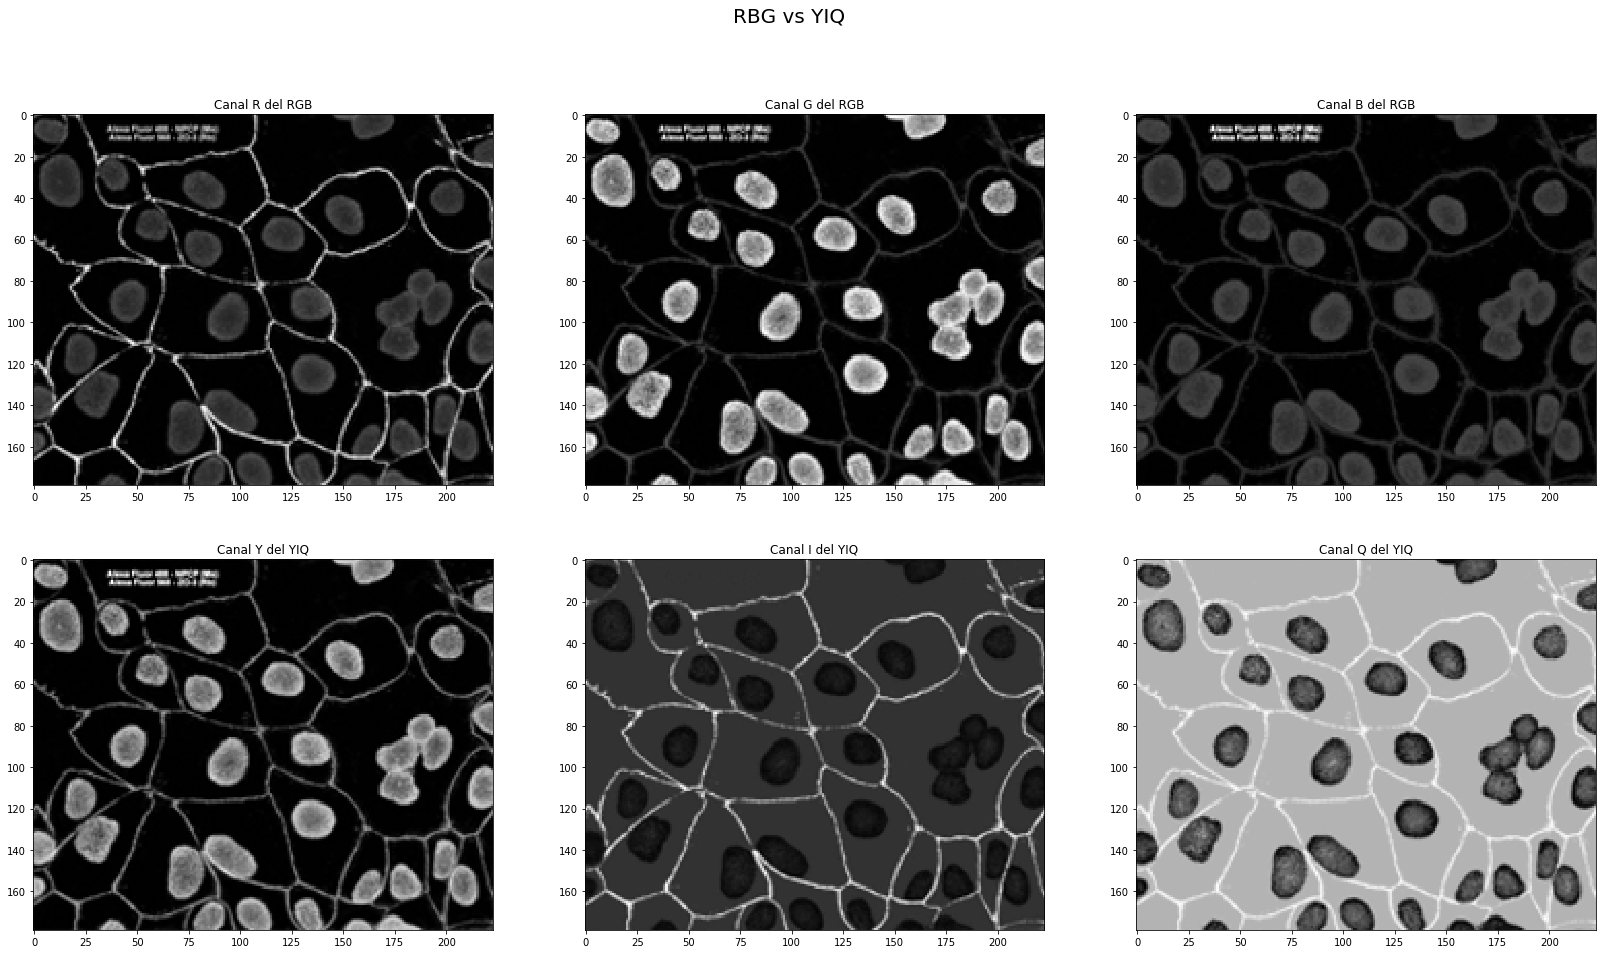

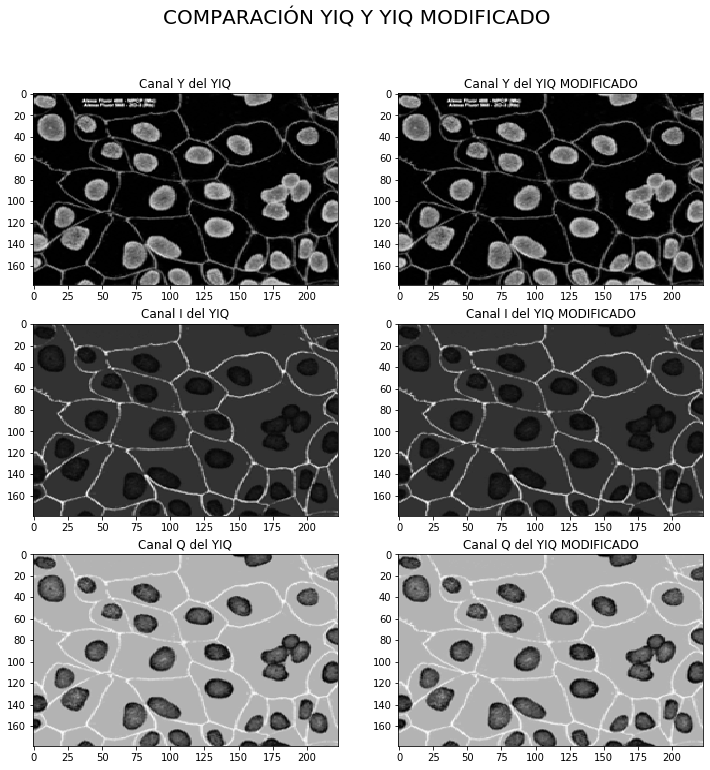

In [3]:
###Escriba su código aquí###
cells = cv2.imread("res/cells.png",cv2.IMREAD_COLOR)

cells_rgb = cv2.cvtColor(cells, cv2.COLOR_BGR2RGB)

cells_R = cells_rgb[:,:,0]
cells_G = cells_rgb[:,:,1]
cells_B = cells_rgb[:,:,2]

cells_Y = 0.30*cells_R + 0.59*cells_G + 0.11*cells_B
cells_I = -0.27*(cells_B-cells_Y) + 0.74*(cells_R-cells_Y)
cells_Q = 0.41*(cells_B-cells_Y) + 0.48*(cells_R-cells_Y)

img_Y = 0.299*cells_R + 0.587*cells_G + 0.114*cells_B
img_I = 0.596*cells_R - 0.274*cells_G - 0.322*cells_B
img_Q = 0.211*cells_R - 0.523*cells_G + 0.312*cells_B

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(28, 15))
fig.suptitle('RBG vs YIQ', fontsize=20)
ax1.set_title('Canal R del RGB')
ax1.imshow(cells_R, cmap='gray', aspect='auto')
ax2.set_title('Canal G del RGB')
ax2.imshow(cells_G, cmap='gray', aspect='auto')
ax3.set_title('Canal B del RGB')
ax3.imshow(cells_B, cmap='gray', aspect='auto')
ax4.set_title('Canal Y del YIQ')
ax4.imshow(cells_Y, cmap='gray', aspect='auto')
ax5.set_title('Canal I del YIQ')
ax5.imshow(cells_I, cmap='gray', aspect='auto')
ax6.set_title('Canal Q del YIQ')
ax6.imshow(cells_Q, cmap='gray', aspect='auto')

fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(3,2, figsize=(12, 12))
fig.suptitle('COMPARACIÓN YIQ Y YIQ MODIFICADO', fontsize=20)
ax1.set_title('Canal Y del YIQ')
ax1.imshow(cells_Y, cmap='gray', aspect='auto')
ax2.set_title('Canal Y del YIQ MODIFICADO')
ax2.imshow(img_Y, cmap='gray', aspect='auto')
ax3.set_title('Canal I del YIQ')
ax3.imshow(cells_I, cmap='gray', aspect='auto')
ax4.set_title('Canal I del YIQ MODIFICADO')
ax4.imshow(img_I, cmap='gray', aspect='auto')
ax5.set_title('Canal Q del YIQ')
ax5.imshow(cells_Q, cmap='gray', aspect='auto')
ax6.set_title('Canal Q del YIQ MODIFICADO')
ax6.imshow(img_Q, cmap='gray', aspect='auto')

¿En qué se diferencia la transformación YIQ, con la transformación ligeramente modificada? ¿Son idénticas? Pruebe comparando con el ejemplo implementado en clase.

Comparando con el ejemplo de clase podemos apreciar que son aparantemente idénticas en la escala de grises.

## Actividad 4.

Obtenga de internet un mapa de alturas cualquiera, en escala de grise. Aplique pseudocolor basado en planos de intensidad, con por lo menos 20 niveles de color NO aleatorios.
<br>Ejemplo de mapa utilizable: https://www.leonardobenini.it/wp-content/uploads/2015/05/02-australia-gray.jpg</br>

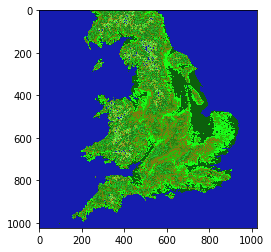

In [4]:
###Escriba su código aquí###
#Librerias necesarias
%matplotlib inline 
import cv2
import numpy as np
import random as rand
import math 
import matplotlib.pyplot as plt

def correspondence(val, paleta, rango):
    '''
    Receives the value of the grayscale, the color palette and size of the range array.
    Returns a tuple from the palette depending on the part of the range to which val belongs.
    '''
    #"Recibe el valor de la escala de grises, la paleta de colores y el tamaño del vector,
    #Devuelve una tupla de la paleta dependiendo del intervalo al cual la variable -val- pertenezca"
   
    pos=int( (val*(rango)/255))-1
    r,g,b=paleta[pos]
    return (r,g,b)

def pseudocolor(img):
    rango = 20
    paleta= [(12,95,12),(23,251,23),(44,183,13),(124,124,14),(54,152,22),
             (42,126,15),(21,203,43),(40,154,36),(29,142,25),(46,168,42),
             (29,118,26),(94,118,26),(140,164,20),(146,167,41),(80,214,50),
             (76,226,42),(120,240,93),(62,185,35),(93,182,73),(21,28,175)]
    #generación aleatoria de la paleta de colores.
    tam=np.shape(img)
    res=np.zeros((tam[0],tam[1], 3), dtype=np.uint8)
    #se aplica a la matriz res, la función de correspondencia con la imagen original en el rango indicado
    for r in range(tam[0]):
        for c in range(tam[1]):
            res[r][c]=correspondence(img[r][c], paleta, rango)
    return res

uk = cv2.imread("res/uk.jpg", cv2.IMREAD_GRAYSCALE)
pseudocolor_uk = pseudocolor(uk)
plt.imshow(pseudocolor_uk)